# Classification Modelling - Iris Species

<b>Use Classification modelling </b> to predict the species of Iris flowers using the classic Iris dataset. The dataset includes 150 observations with four features: sepal length, sepal width, petal length, and petal width, each categorized into one of three species: Iris-setosa, Iris-versicolor, or Iris-virginica.

Our goal is to build multiple classification models and compare them to determine which one accurately classifies iris species based on these features.

In [15]:
#importing the necessary libraries from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import numpy as np


In [16]:
iris=load_iris()
#print(iris.data , iris.target)
np.all(iris.data)

True

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
x=iris.data
y=iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
#Column feature names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
#Iris target names - Species
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
iris.data.shape

(150, 4)

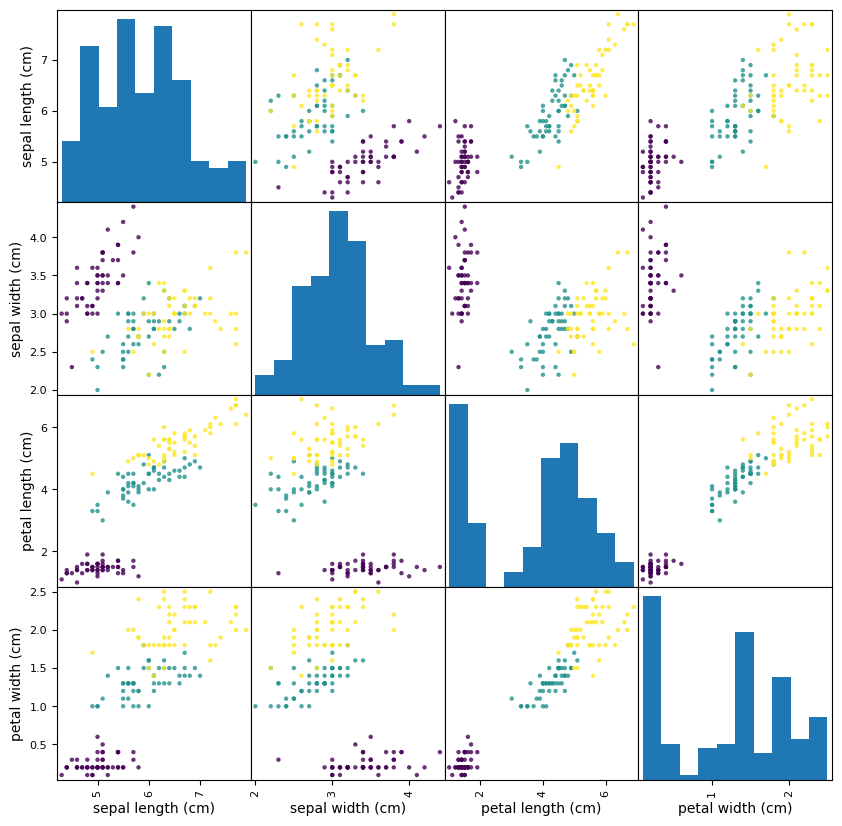

In [14]:
import pandas as pd
from pandas.plotting import scatter_matrix

#ScatterPlot Matrix
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#Peter
df = pd.DataFrame(x, columns=iris['feature_names'])

#scatter_matrix is Numpy
plot=scatter_matrix(df, c=iris.target , marker= 'o' , s=10 , alpha=0.8 , figsize=(10,10))


In [22]:
!pip install plotly 
# Takes a while, run this line once

In [23]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(x, color=iris.target, 
                              labels=iris.feature_names,
                              color_continuous_midpoint=1)
fig.show()

## Conclusions for Feature Selection:
 - Petal length and Width lead to greatest distinction. 
 - Sepal still provides information. All input variables are floats.  
 - a Simplified classification model like a Decision Tree will be modelled first. Accuracy threshold = 90%.

In [ ]:
#1 Split the dataset

#randomise the split

test_ids = np.random.permutation(len(x))

In [ ]:
#splitting data and labels into train and test
#keeping the first 100 entries for training, last 50 for testing.
x_train = x[test_ids[:-50]]
x_test = x[test_ids[-50: ]]

y_train = y[test_ids[:-50]]
y_test = y[test_ids[-50:]]

## Model Building - Logistic regression

In [ ]:
log_feat=x_train[:, 2:5]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


logreg = LogisticRegression(max_iter=200)

# Train the model
logreg.fit(log_feat, y_train)



In [ ]:
# Predict the labels for the test set
log_test=x_test[: , 2:5]

y_pred = logreg.predict(log_test)


In [12]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

NameError: name 'y_test' is not defined

## Model Building - Decision Trees

In [ ]:
#creating an object from a class (more on this next workshop)
clf = tree.DecisionTreeClassifier()


#training (fitting) the classifier with the training set
clf.fit(x_train, y_train)

In [ ]:
import matplotlib.pyplot as plt

#Visualise
fig = plt.figure(figsize=(25,20))
tree_iris = tree.plot_tree(clf, 
                           feature_names = iris.feature_names ,
                           class_names= iris.target_names,
                           filled= 'TRUE' )



In [ ]:
#You can save the Model visualisation with:
fig.savefig("decision_tree.pdf")

## Evaluate our model, using the metric Accuracy

In [ ]:
#predictions on the test dataset
pred = clf.predict(x_test)
print(pred) #predicted labels i.e flower species

print(y_test) #actual labels
print((accuracy_score(pred, y_test))*100) #prediction accuracy


In [ ]:
#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


#initializing knn
knn = KNeighborsClassifier(n_neighbors=5)
#training
knn.fit(x_train, y_train)
#testing
predicted_specis = knn.predict(x_test)
print("predicted data\n{}".format(predicted_specis))
#printing % of accuracy using mean
print("accuracy: {:.2f}%".format(100*np.mean(predicted_specis == y_test)))


In [ ]:
# Heat map
#QAWebex26 01/08/2024 12:05 • 
import seaborn as sns
sns.heatmap(conf_matrix, center=0, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)


## Exercise 5 – Building a Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state = 42)

dt.fit(X_train[cols], y_train)

y_pred_dt = dt.predict(X_test[cols])

NameError: name 'x_train' is not defined